#특징점 추출 및 매칭

In [ ]:
# !pip uninstall opencv-python
# !pip uninstall opencv-contrib-python
# !pip install opencv-python==3.4.0.14
# !pip install opencv-contrib-python

# 3.4.2.16 이상에서는 SURF 알고리즘 지원을 하지 않아 버전을 맞춰줍니다.

#file = open('/content/drive/MyDrive/차량비전시스템/src/opencv_python-3.4.2.16-cp37-cp37m-manylinux1_i686.whl')
#!pip install file

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import cv2
cv2.__version__

'4.7.0'

In [3]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumBarunGothic') 
import numpy as np
import cv2
# from google.colab import drive
# drive.mount('/content/drive')

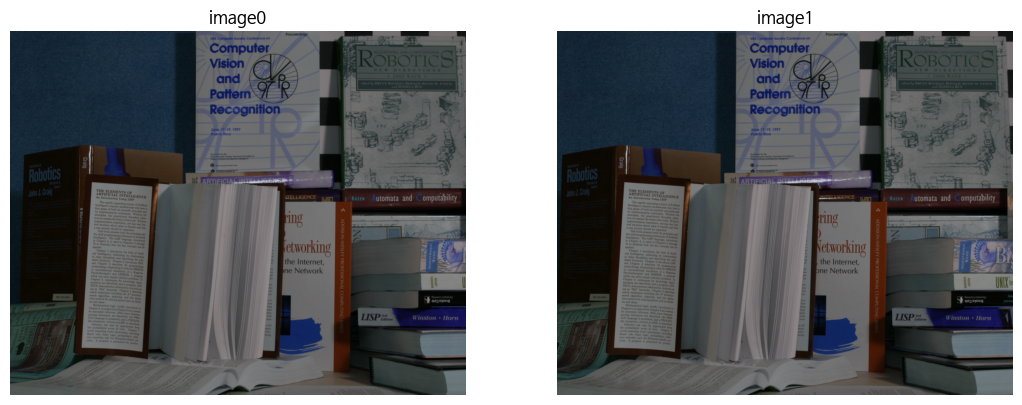

In [4]:
img0 = cv2.imread('./src/view0.png')
img1 = cv2.imread('./src/view1.png')
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

pylab.figure(figsize=(20, 10)),pylab.gray()
# 하나의 출력창에 모두 보여주려면 아래와 같이 subplot 함수를 사용
pylab.subplot (2, 3, 1), pylab.imshow(img0)
pylab.title('image0'), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow(img1)
pylab.title('image1'), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

[ WARN:0@1.510] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


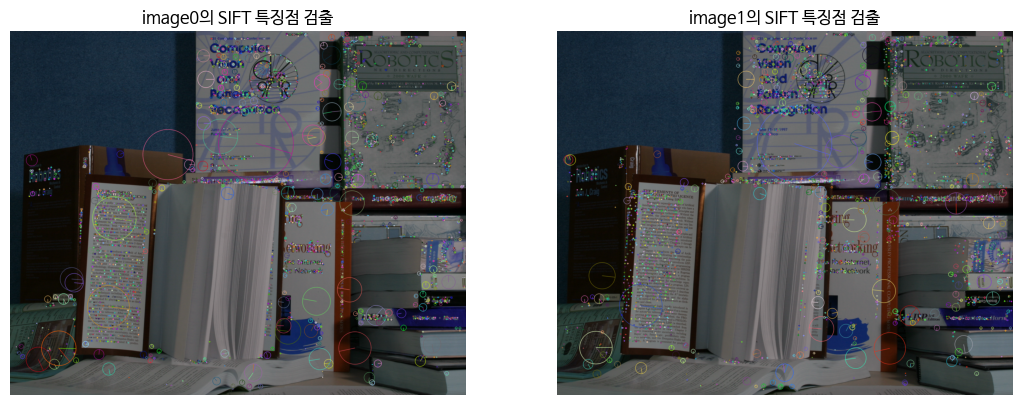

In [5]:
import cv2
# SIFT 추출기 생성
sift = cv2.xfeatures2d.SIFT_create()
# 키 포인트 검출과 서술자 계산
SIFT_keypoints0, SIFT_descriptor0 = sift.detectAndCompute(gray0, None)
SIFT_keypoints1, SIFT_descriptor1 = sift.detectAndCompute(gray1, None)

# 키 포인트 그리기
SIFT_img0 = cv2.drawKeypoints(img0, SIFT_keypoints0, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
SIFT_img1 = cv2.drawKeypoints(img0, SIFT_keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
pylab.figure(figsize=(20, 10)),pylab.gray()
# 하나의 출력창에 모두 보여주려면 아래와 같이 subplot 함수를 사용
pylab.subplot (2, 3, 1), pylab.imshow(SIFT_img0)
pylab.title('image0의 SIFT 특징점 검출'), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow(SIFT_img1)
pylab.title('image1의 SIFT 특징점 검출'), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

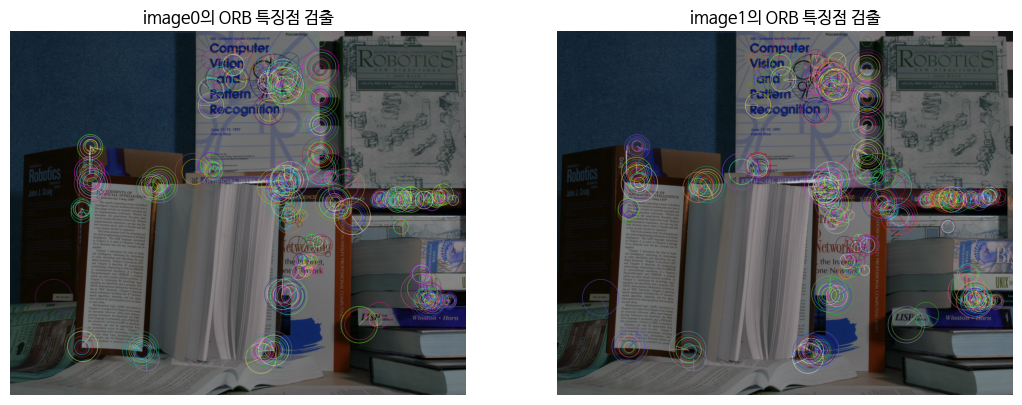

In [6]:
# ORB 추출기 생성
orb = cv2.ORB_create()

# 키 포인트 검출과 서술자 계산
ORB_keypoints0, ORB_descriptor0 = orb.detectAndCompute(img0, None)
ORB_keypoints1, ORB_descriptor1 = orb.detectAndCompute(img0, None)

# 키 포인트 그리기
ORB_img0 = cv2.drawKeypoints(img0, ORB_keypoints0, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ORB_img1 = cv2.drawKeypoints(img1, ORB_keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
pylab.figure(figsize=(20, 10)),pylab.gray()
# 하나의 출력창에 모두 보여주려면 아래와 같이 subplot 함수를 사용
pylab.subplot (2, 3, 1), pylab.imshow(ORB_img0)
pylab.title('image0의 ORB 특징점 검출'), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow(ORB_img1)
pylab.title('image1의 ORB 특징점 검출'), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

In [7]:
cv2.setNumThreads(0)
# SURF 추출기 생성 ( 경계:1000, 피라미드:3, 서술자확장:True, 방향적용:True)
surf = cv2.xfeatures2d.SURF_create(1000)
# 키 포인트 검출 및 서술자 계산
keypoints, desc = surf.detectAndCompute(gray0, None)
print(desc.shape, desc)
# 키포인트 이미지에 그리기
img_draw = cv2.drawKeypoints(img0, keypoints, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


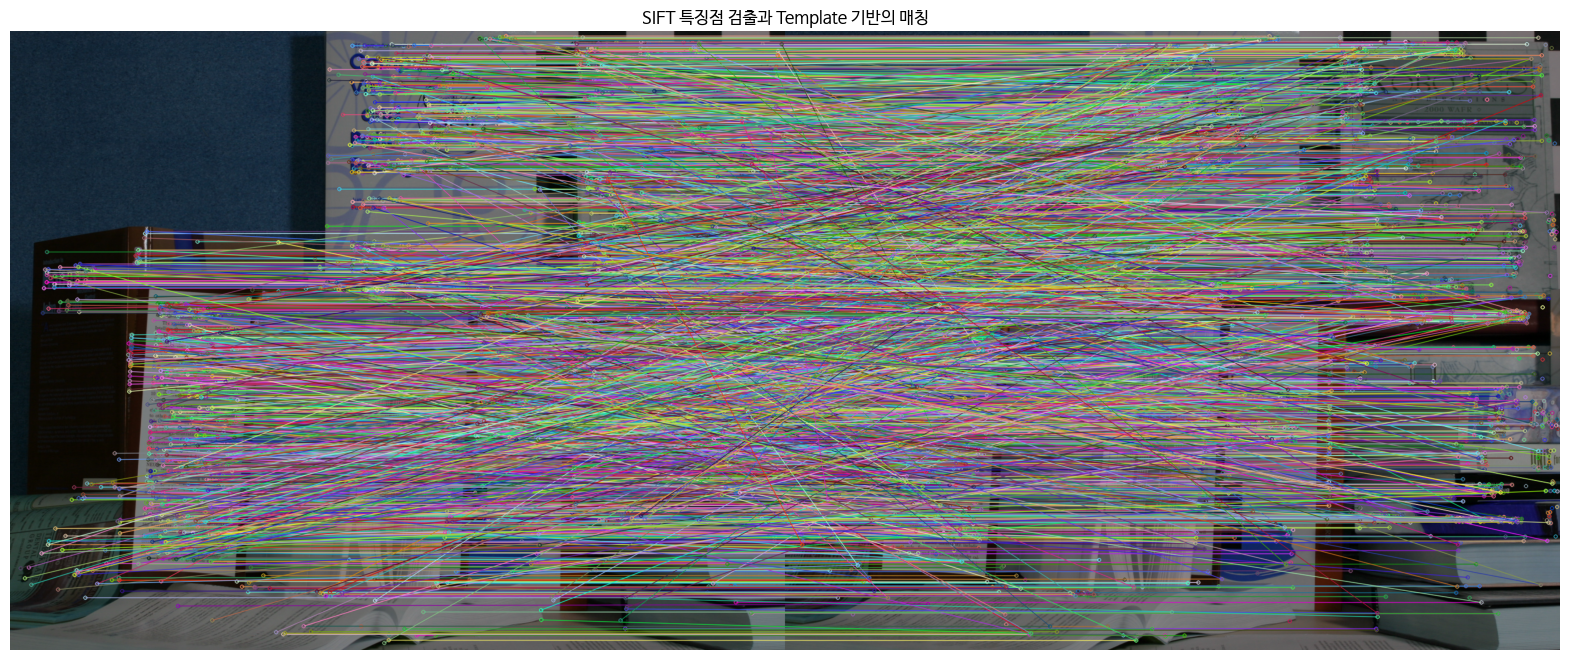

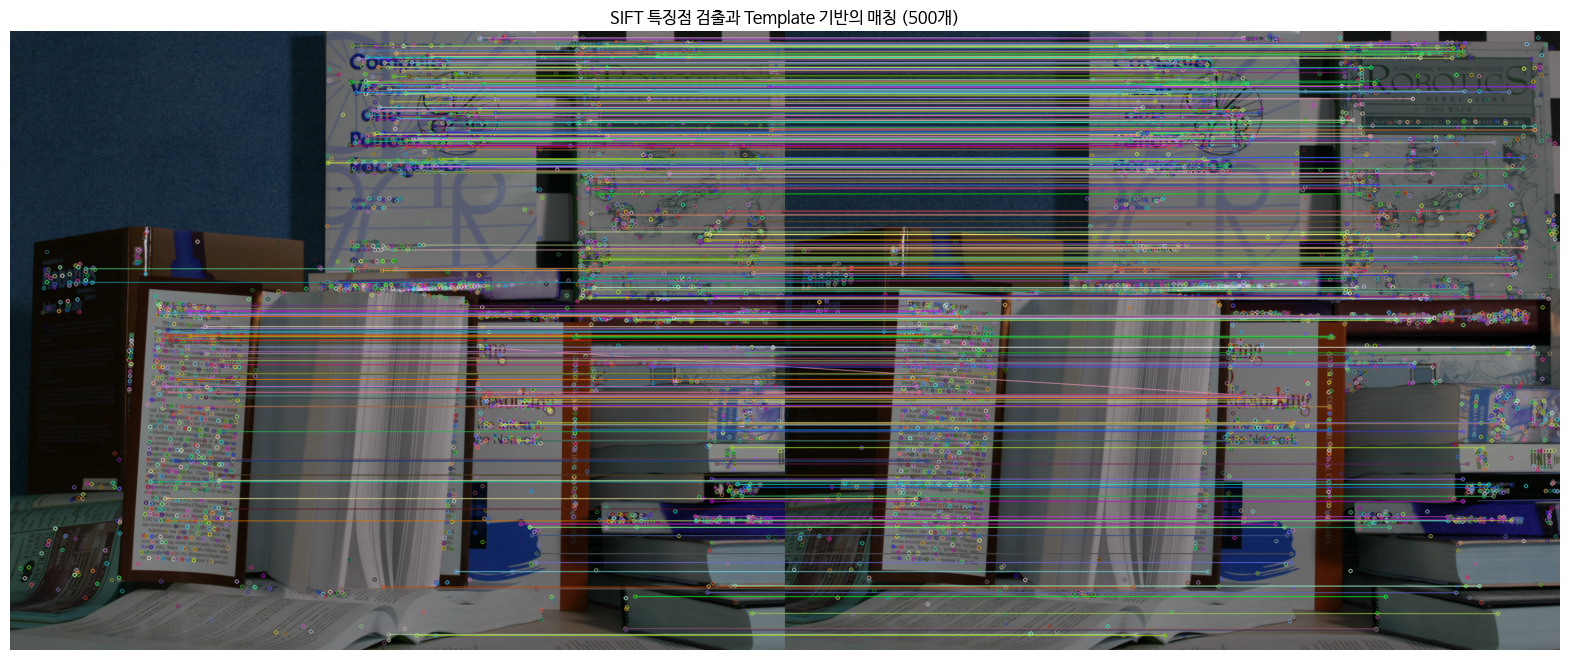

(<matplotlib.image.AxesImage at 0x1125b0b10>, None)

In [ ]:
# Brute-Force 매칭기 사용
bf = cv2.BFMatcher()

# 두 이미지의 특징점을 매칭
matches = bf.match(SIFT_descriptor0, SIFT_descriptor1)

# 매칭 결과를 거리 기준으로 정렬
matches = sorted(matches, key=lambda val: val.distance)

# 모든 특징점들을 매칭
out = cv2.drawMatches(img0, SIFT_keypoints0, img1, SIFT_keypoints1, matches, None)

pylab.figure(figsize=(20, 10)),pylab.gray()
pylab.title('SIFT 특징점 검출과 Template 기반의 매칭'), pylab.axis('off')
pylab.imshow(out), pylab.show()


# 모든 특징점들을 출력하니 너무 많아 보기 이렵기 때문에, 일부(500개)만 제한적으로 출력
out = cv2.drawMatches(img0, SIFT_keypoints0, img1, SIFT_keypoints1, matches[:500], None)

pylab.figure(figsize=(20, 10)),pylab.gray()
pylab.title('SIFT 특징점 검출과 Template 기반의 매칭 (500개)'), pylab.axis('off')
pylab.imshow(out), pylab.show()

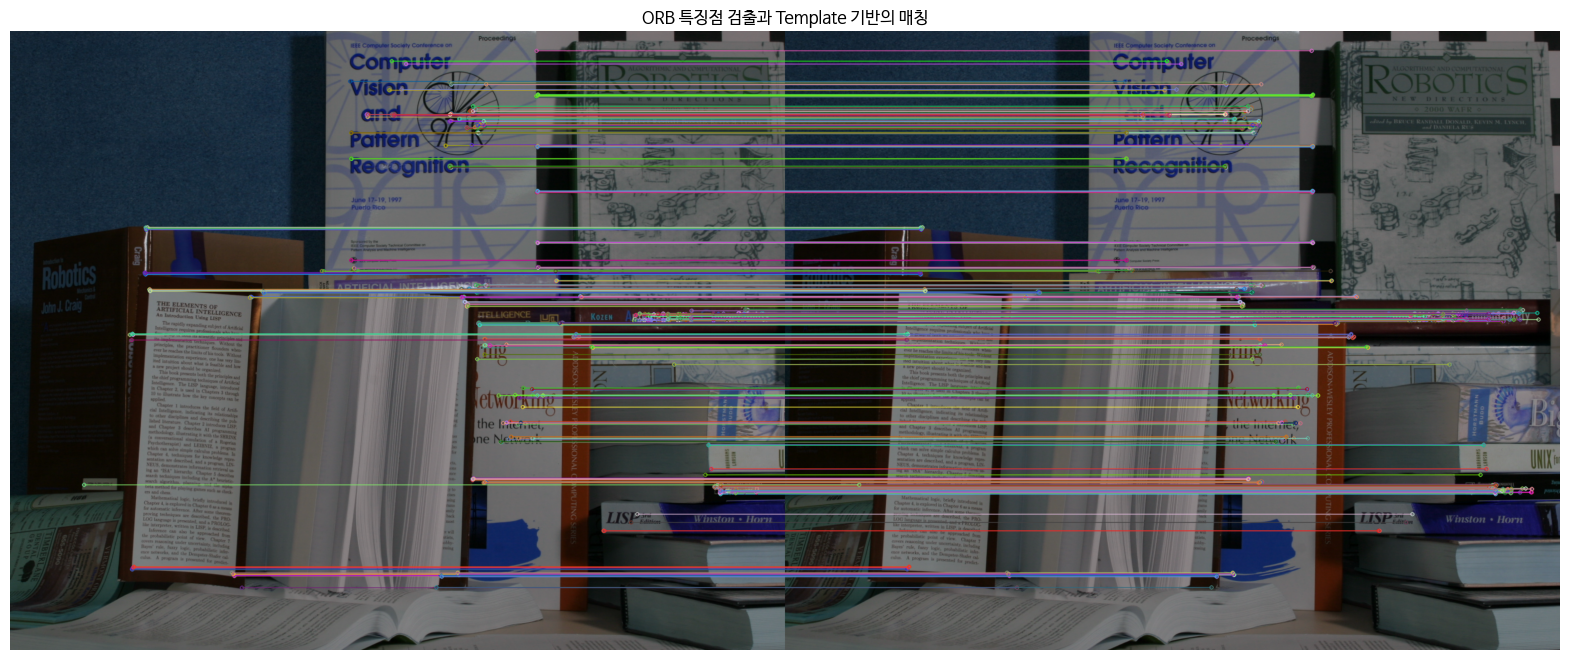

(<matplotlib.image.AxesImage at 0x137e74190>, None)

In [ ]:
# Brute-Force 매칭기 사용
bf = cv2.BFMatcher()

# 두 이미지의 특징점을 매칭
matches = bf.match(ORB_descriptor0, ORB_descriptor1)

# 매칭 결과를 거리 기준으로 정렬
matches = sorted(matches, key=lambda val: val.distance)

# 모든 특징점들을 매칭
out = cv2.drawMatches(img0, ORB_keypoints0, img1, ORB_keypoints1, matches, None)

pylab.figure(figsize=(20, 10)),pylab.gray()
pylab.title('ORB 특징점 검출과 Template 기반의 매칭'), pylab.axis('off')
pylab.imshow(out), pylab.show()